# Getting a Model

Interesting Observations About Dataset
- May be imbalanced data - what percent of houses are sold within 60 days?
- Time series data - there are definitely times of the year where the market is hotter than other times

In [192]:
%run src/imports.py

In [128]:
sns.set(rc={'figure.figsize':(16,4)})

In [129]:
neighborhoods_cleaned = pd.read_pickle('data/neighborhoods_cleaned.pkl')

In [130]:
neighborhoods_cleaned.reset_index(inplace=True)

In [131]:
neighborhoods_cleaned.drop('index',axis=1,inplace=True)

In [132]:
pd.get_dummies(neighborhoods_cleaned['LOCATION'])

,Abrego Lake,Alamo Heights,Alamo Ranch,Alta Vista,Amhurst,Apple Creek,Arbor At Sonoma Ranch,Arcadia Ridge,Asher Place,Auburn Hills At Woodcrest,...,Wildhorse,Wildhorse At Tausch Farms,Willow Grove Sub (sc),Wilshire Terrace,Wilshire Village,Windcrest,Wolf Creek,Woodcrest,Woodlake,Woods Of Shavano
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
### Categorize based on days on market

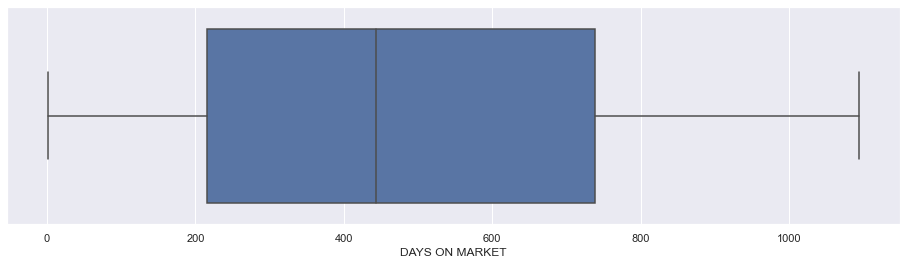

In [134]:
ax = sns.boxplot(x=neighborhoods_cleaned['DAYS ON MARKET'])

Could create app that lets you input days on market and outputs data below

In [135]:
neighborhoods_cleaned['RESULT'] = neighborhoods_cleaned['DAYS ON MARKET'] <= 60

In [136]:
neighborhoods_cleaned['RESULT'].replace([True,False],[1,0],inplace=True)

In [137]:
print('Number of Houses Sold Within 60 days = {}'.format(neighborhoods_cleaned['RESULT'].sum()))
print('Total Number of Houses Sold in Dataset = {}'.format(len(neighborhoods_cleaned)))
print('Percentage of Houses Sold Within 60 Days = {}'.format(round(neighborhoods_cleaned['RESULT'].sum()/len(neighborhoods_cleaned),2)))

Number of Houses Sold Within 60 days = 1147
Total Number of Houses Sold in Dataset = 20012
Percentage of Houses Sold Within 60 Days = 0.06


## MODEL

In [138]:
neighborhoods_cleaned['SOLD DATE'] = pd.to_datetime(neighborhoods_cleaned['SOLD DATE'])

In [139]:
neighborhoods_cleaned['YEAR'] = pd.DatetimeIndex(neighborhoods_cleaned['SOLD DATE']).year
neighborhoods_cleaned['MONTH'] = pd.DatetimeIndex(neighborhoods_cleaned['SOLD DATE']).month

In [140]:
neighborhoods_cleaned

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,LOCATION,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,ROOMS PER SQFT * 1000,RESULT,YEAR,MONTH
0,2020-09-25,Single Family Residential,6702 Frua Ln,San Antonio,TX,78257,345000,The Dominion,5662.0,2005.0,170.0,173.0,230.0,29.647801,-98.614186,2.011061,0,2020,9
1,2020-06-11,Single Family Residential,315 Persimmon Trl,San Antonio,TX,78256,337500,Stonewall Ranch,9583.0,2004.0,276.0,156.0,54.0,29.650304,-98.629082,2.770083,0,2020,6
2,2021-03-11,Single Family Residential,610 Cypress Trl,San Antonio,TX,78256,375500,Stonewall Ranch,6605.0,2004.0,3.0,126.0,54.0,29.651842,-98.630650,2.189289,1,2021,3
3,2018-10-31,Single Family Residential,18342 Branson Fls,San Antonio,TX,78255,462000,The Ridge @ Sonoma Verde,9147.0,2014.0,865.0,170.0,95.0,29.617650,-98.643430,2.577320,0,2018,10
4,2021-02-26,Single Family Residential,6611 Sierra Oaks,San Antonio,TX,78256,624000,Crownridge,75794.0,2000.0,16.0,207.0,25.0,29.620646,-98.622295,1.826029,1,2021,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20007,2019-09-26,Single Family Residential,5926 Whispering Lake St,San Antonio,TX,78222,153000,Lakeside,6969.0,1983.0,535.0,97.0,NaN,29.383410,-98.376520,3.170577,0,2019,9
20008,2018-07-30,Single Family Residential,5510 Goliad Sand,San Antonio,TX,78222,189900,Riposa Vita,4791.0,2018.0,958.0,112.0,25.0,29.386700,-98.379900,3.523194,0,2018,7
20009,2019-03-25,Single Family Residential,5931 Pleasant Lk,San Antonio,TX,78222,128000,Lakeside,5662.0,1985.0,720.0,116.0,NaN,29.383092,-98.376562,4.537205,0,2019,3
20010,2019-03-29,Single Family Residential,6006 Bear Br,San Antonio,TX,78222,196499,Foster Meadows,5662.0,2014.0,716.0,85.0,6.0,29.379346,-98.370269,3.012048,0,2019,3


In [141]:
neighborhoods_cleaned.drop(['PROPERTY TYPE','ADDRESS','CITY','STATE OR PROVINCE','LOCATION','SOLD DATE','HOA/MONTH','DAYS ON MARKET'],axis=1,inplace=True)

In [147]:
neighborhoods_cleaned

,ZIP OR POSTAL CODE,PRICE,LOT SIZE,YEAR BUILT,$/SQUARE FEET,LATITUDE,LONGITUDE,ROOMS PER SQFT * 1000,RESULT,YEAR,MONTH
0,78257,345000,5662.0,2005.0,173.0,29.647801,-98.614186,2.011061,0,2020,9
1,78256,337500,9583.0,2004.0,156.0,29.650304,-98.629082,2.770083,0,2020,6
2,78256,375500,6605.0,2004.0,126.0,29.651842,-98.630650,2.189289,1,2021,3
3,78255,462000,9147.0,2014.0,170.0,29.617650,-98.643430,2.577320,0,2018,10
4,78256,624000,75794.0,2000.0,207.0,29.620646,-98.622295,1.826029,1,2021,2
...,...,...,...,...,...,...,...,...,...,...,...
20007,78222,153000,6969.0,1983.0,97.0,29.383410,-98.376520,3.170577,0,2019,9
20008,78222,189900,4791.0,2018.0,112.0,29.386700,-98.379900,3.523194,0,2018,7
20009,78222,128000,5662.0,1985.0,116.0,29.383092,-98.376562,4.537205,0,2019,3
20010,78222,196499,5662.0,2014.0,85.0,29.379346,-98.370269,3.012048,0,2019,3


In [157]:
X_df = neighborhoods_cleaned.drop('RESULT',axis=1)

In [142]:
neighborhoods_cleaned.dropna(how='any',inplace=True)

In [143]:
y = neighborhoods_cleaned['RESULT'].values

In [158]:
X = X_df.values

In [200]:
pipe = Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier())])
# format is pipelinename__hyperparamname
grid_params = {'classifier__max_depth': [3,6,9]}
grid = GridSearchCV(pipe, param_grid=grid_params, cv=StratifiedKFold(10, shuffle=True))
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [3, 6, 9]})

In [195]:
grid.score(X_test,y_test)

0.9945487583282859

In [202]:
print('y_test total length: {}'.format(len(y_test)), '','y_yest yesses: {}'.format(y_test.sum()))

y_test total length: 4953  y_yest yesses: 267


In [203]:
print('y_test total length: {}'.format(len(y_predict)), '','y_yest yesses: {}'.format(y_predict.sum()))

y_test total length: 4953  y_yest yesses: 294


In [198]:
y_predict = grid.predict(X_test)
print("precision:", precision_score(y_test, y_predict))
print("recall:", recall_score(y_test,y_predict))
print("accuracy:", accuracy_score(y_test,y_predict))
print("roc-auc score:", roc_auc_score(y_test,y_predict))
print("f1 score:", f1_score(y_test,y_predict))

precision: 0.9081632653061225
recall: 1.0
accuracy: 0.9945487583282859
roc-auc score: 0.9971190781049937
f1 score: 0.9518716577540107


Recall is 1.0 - this means there are 0 false negatives, there were 0 houses that were predicted to not be sold within 60 days that were sold within 60 days.  

We want to minimize houses that we predict are going to be sold within 60 days that are not - minimizing false positives - maximizing precision

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [160]:
y_train.sum()

866

In [168]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)
print("score:", rf.score(X_test, y_test))
print("precision:", precision_score(y_test, y_predict))
print("recall:", recall_score(y_test,y_predict))

score: 0.9935392691298203
precision: 0.9181494661921709
recall: 0.9662921348314607


## Reminder

Precision = True Positive / (True Positive + False Positive)

Recall = True Positive / (True Positive + False Negative)

Accuracy = (True Positive + True Negative) / Total

Precision - Houses Predicted to Be Sold Within 60 days and Sold within 60 days over (those + houses predicted to be sold within 60 days that weren't)

Recall - Houses predicted to be sold within 60 days and sold within 60 days over (those + houses that were predicted to not be sold within 60 days that were)